In [1]:
from sympy import *
init_printing() 

## symbols for asexual haploid approximation for RI ##

s = Symbol('s') # selection
h = Symbol('h') # dominance
u = Symbol('mu') # epimutation
y = Symbol('varphi') # adaptive skew
m = Symbol('m') # migration

# haploid genotypes
EB1 = Symbol('EB_1')
eB1 = Symbol('eB_1')
Eb1 = Symbol('Eb_1')
eb1 = Symbol('eb_1')
EB2 = Symbol('EB_2')
eB2 = Symbol('eB_2')
Eb2 = Symbol('Eb_2')
eb2 = Symbol('eb_2')

## symbols for comparing to other models ##
 
ue = Symbol('mu_e')
ye = Symbol('varphi_e')

g = Symbol('g')
v = Symbol('v')

bigU = Symbol('U')
e = Symbol('epsilon')

t = Symbol('tau')
ua = Symbol('mu_A')
um = Symbol('mu_M')

al = Symbol('alpha') # beneficial epimutation rate
be = Symbol('beta') # deleterious epimutation rate

l = Symbol('lambda')
d = Symbol('delta')


## symbols for classic equilibria derivations ##
E_t = symbols('E_t')
e_t = symbols('e_t')
E_s = symbols('E_s')
e_s = symbols('e_s')
E_u = symbols('E_u')
e_u = symbols('e_u')
E_m = symbols('E_m')
e_m = symbols('e_m')
E_t1 = symbols('E_t1')
e_t1 = symbols('e_t1')
w_bar = symbols('w_bar')


In [2]:
########################################################
## Matricies for asexual haploid approximation for RI ##
########################################################

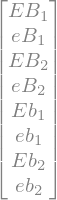

In [3]:
X = Matrix([EB1,
            eB1,
            EB2,
            eB2,
            Eb1,
            eb1,
            Eb2,
            eb2])
X

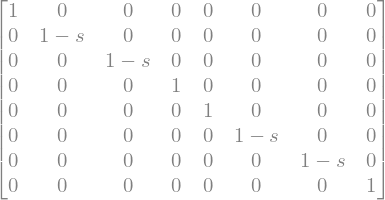

In [4]:
S = Matrix([[1,0,0,0,0,0,0,0],
            [0,1-s,0,0,0,0,0,0],
            [0,0,1-s,0,0,0,0,0],
            [0,0,0,1,0,0,0,0],
            [0,0,0,0,1,0,0,0],
            [0,0,0,0,0,1-s,0,0],
            [0,0,0,0,0,0,1-s,0],
            [0,0,0,0,0,0,0,1]])
S

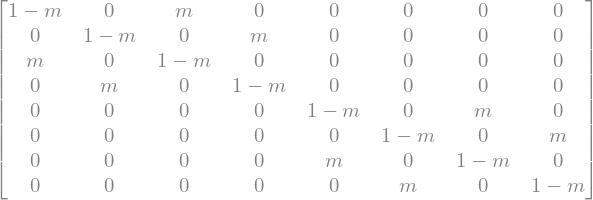

In [5]:
# Migration matrix
M = Matrix([
    [1 - m, 0, m, 0,    0, 0, 0, 0],
    [0, 1 - m, 0, m,    0, 0, 0, 0],
    [m, 0, 1 - m, 0,    0, 0, 0, 0],
    [0, m, 0, 1 - m,    0, 0, 0, 0],
    [0, 0, 0, 0,    1 - m, 0, m, 0],
    [0, 0, 0, 0,    0, 1 - m, 0, m],
    [0, 0, 0, 0,    m, 0, 1 - m, 0],
    [0, 0, 0, 0,    0, m, 0, 1 - m]
])

# Print the migration matrix
M

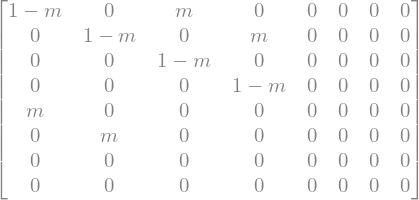

In [6]:
# Contact migration matrix
Mc = Matrix([
    [1 - m, 0, m, 0,    0, 0, 0, 0],
    [0, 1 - m, 0, m,    0, 0, 0, 0],
    [0, 0, 1 - m, 0,    0, 0, 0, 0],
    [0, 0, 0, 1 - m,    0, 0, 0, 0],
    [m, 0, 0, 0,    0, 0, 0, 0],
    [0, m, 0, 0,    0, 0, 0, 0],
    [0, 0, 0, 0,    0, 0, 0, 0],
    [0, 0, 0, 0,    0, 0, 0, 0]
])

# Print the contact migration matrix
Mc

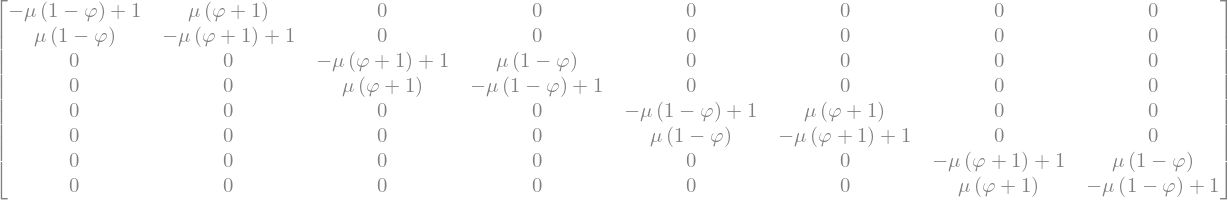

In [7]:

# Define the 2x2 transformation matrix for [E, e] with y
U1 = Matrix([
    [1 - u*(1 - y), u*(1 + y)],
    [u*(1 - y), 1 - u*(1 + y)]
])

# Define the 2x2 transformation matrix for [E, e] with -y
U2 = Matrix([
    [1 - u*(1 + y), u*(1 - y)],
    [u*(1 + y), 1 - u*(1 - y)]
])

# Create the 8x8 transformation matrix
U = eye(8)

# Apply the 2x2 transformation to the relevant pairs in the 8x8 matrix
U[0:2, 0:2] = U1
U[2:4, 2:4] = U2
U[4:6, 4:6] = U1
U[6:8, 6:8] = U2
U

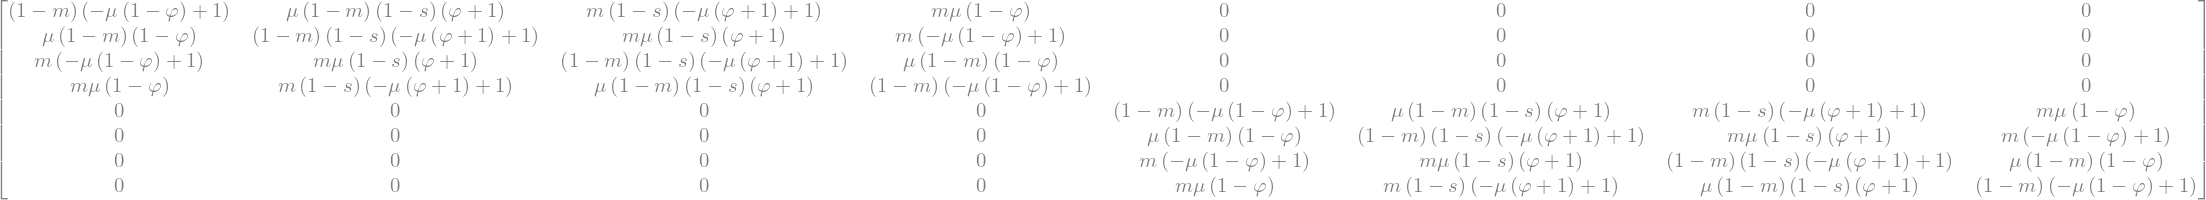

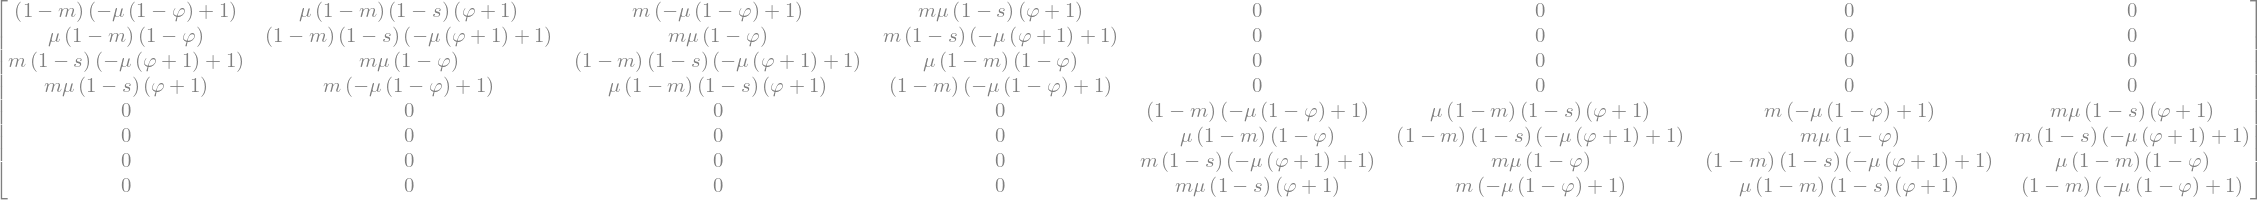

In [8]:
MUS = M*U*S
USM = U*S*M
display(MUS,USM) # these are the final outputs

In [9]:
################################################
## Comparing to other models of (epi)mutation ##
################################################

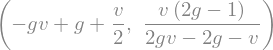

In [10]:
# two life history stages
# reset then induciton

# Define the two equations
eq1 = Eq(g, ue * (1 - ye))
eq2 = Eq(v * (1 - g) + g * (1 - v), ue * (1 + ye))

# Solve eq1 for mu
ue_solution = solve(eq1, ue)[0]

# Substitute mu in eq2
eq2_substituted = eq2.subs(ue, ue_solution)

# Solve eq2_substituted for varphi
ye_solution = solve(eq2_substituted, ye)[0]

# Now, substitute varphi_solution into eq1 and solve for mu
ue_final_solution = ue_solution.subs(ye, ye_solution)

# Display the solutions
simplify(ue_final_solution), simplify(ye_solution)

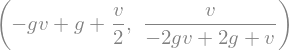

In [11]:
# two life history stages
# induction then reset

# Define the two equations
eq1 = Eq(g - v * g, ue * (1 - ye))
eq2 = Eq(g + v - v * g, ue * (1 + ye))

# Solve eq1 for mu
ue_solution = solve(eq1, ue)[0]

# Substitute mu in eq2
eq2_substituted = eq2.subs(ue, ue_solution)

# Solve eq2_substituted for varphi
ye_solution = solve(eq2_substituted, ye)[0]

# Now, substitute varphi_solution into eq1 and solve for mu
ue_final_solution = ue_solution.subs(ye, ye_solution)

# Display the solutions
simplify(ue_final_solution), simplify(ye_solution)

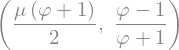

In [12]:
# smithson et al., 2019

# Define the two equations
eq1 = Eq(u, ue * (1 - ye))
eq2 = Eq(u * y, ue * (1 + ye))

# Solve eq1 for mu
ue_solution = solve(eq1, ue)[0]

# Substitute mu in eq2
eq2_substituted = eq2.subs(ue, ue_solution)

# Solve eq2_substituted for varphi
ye_solution = solve(eq2_substituted, ye)[0]

# Now, substitute varphi_solution into eq1 and solve for mu
ue_final_solution = ue_solution.subs(ye, ye_solution)

# Display the solutions
simplify(ue_final_solution), simplify(ye_solution)

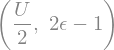

In [13]:
# Goyal et al., 2012

# Define the two equations
eq1 = Eq(bigU * (1 - e), ue * (1 - ye))
eq2 = Eq(bigU * e, ue * (1 + ye))

# Solve eq1 for mu
ue_solution = solve(eq1, ue)[0]

# Substitute mu in eq2
eq2_substituted = eq2.subs(ue, ue_solution)

# Solve eq2_substituted for varphi
ye_solution = solve(eq2_substituted, ye)[0]

# Now, substitute varphi_solution into eq1 and solve for mu
ue_final_solution = ue_solution.subs(ye, ye_solution)

# Display the solutions
simplify(ue_final_solution), simplify(ye_solution)

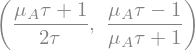

In [14]:
# Greenspoon patch 1

# Define the two equations
eq1 = Eq(t, 1 / (ue*(1-ye)))
eq2 = Eq(ua, ue * (1 + ye))

# Solve eq1 for mu
ue_solution = solve(eq1, ue)[0]

# Substitute mu in eq2
eq2_substituted = eq2.subs(ue, ue_solution)

# Solve eq2_substituted for varphi
ye_solution = solve(eq2_substituted, ye)[0]

# Now, substitute varphi_solution into eq1 and solve for mu
ue_final_solution = ue_solution.subs(ye, ye_solution)

# Display the solutions
simplify(ue_final_solution), simplify(ye_solution)

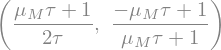

In [15]:
# Greenspoon patch 0

# Define the two equations
eq1 = Eq(t, 1 / (ue*(1+ye)))
eq2 = Eq(um, ue * (1 - ye))

# Solve eq1 for mu
ue_solution = solve(eq1, ue)[0]

# Substitute mu in eq2
eq2_substituted = eq2.subs(ue, ue_solution)

# Solve eq2_substituted for varphi
ye_solution = solve(eq2_substituted, ye)[0]

# Now, substitute varphi_solution into eq1 and solve for mu
ue_final_solution = ue_solution.subs(ye, ye_solution)

# Display the solutions
simplify(ue_final_solution), simplify(ye_solution)

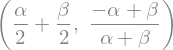

In [16]:
# Slatkin 2009

# Define the two equations
eq1 = Eq(al, ue * (1 - ye))
eq2 = Eq(be, ue * (1 + ye))

# Solve eq1 for mu
ue_solution = solve(eq1, ue)[0]

# Substitute mu in eq2
eq2_substituted = eq2.subs(ue, ue_solution)

# Solve eq2_substituted for varphi
ye_solution = solve(eq2_substituted, ye)[0]

# Now, substitute varphi_solution into eq1 and solve for mu
ue_final_solution = ue_solution.subs(ye, ye_solution)

# Display the solutions
simplify(ue_final_solution), simplify(ye_solution)

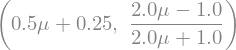

In [17]:
# furrow 2011 (epigenetic transmission)

# Define the two equations
eq1 = Eq(0.5, ue * (1 - ye))
eq2 = Eq(u, ue * (1 + ye))

# Solve eq1 for mu
ue_solution = solve(eq1, ue)[0]

# Substitute mu in eq2
eq2_substituted = eq2.subs(ue, ue_solution)

# Solve eq2_substituted for varphi
ye_solution = solve(eq2_substituted, ye)[0]

# Now, substitute varphi_solution into eq1 and solve for mu
ue_final_solution = ue_solution.subs(ye, ye_solution)

# Display the solutions
simplify(ue_final_solution), simplify(ye_solution)

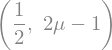

In [18]:
# furrow 2011 (no epigenetic transmission)

# Define the two equations
eq1 = Eq(1-u, ue * (1 - ye))
eq2 = Eq(u, ue * (1 + ye))

# Solve eq1 for mu
ue_solution = solve(eq1, ue)[0]

# Substitute mu in eq2
eq2_substituted = eq2.subs(ue, ue_solution)

# Solve eq2_substituted for varphi
ye_solution = solve(eq2_substituted, ye)[0]

# Now, substitute varphi_solution into eq1 and solve for mu
ue_final_solution = ue_solution.subs(ye, ye_solution)

# Display the solutions
simplify(ue_final_solution), simplify(ye_solution)

In [19]:
# Lachmann and Jablonka 1996 (neutral)

# Define the two equations
eq1 = Eq(u, ue * (1 - ye))
eq2 = Eq(u, ue * (1 + ye))

# Solve eq1 for mu
ue_solution = solve(eq1, ue)[0]

# Substitute mu in eq2
eq2_substituted = eq2.subs(ue, ue_solution)

# Solve eq2_substituted for varphi
ye_solution = solve(eq2_substituted, ye)[0]

# Now, substitute varphi_solution into eq1 and solve for mu
ue_final_solution = ue_solution.subs(ye, ye_solution)

# Display the solutions
simplify(ue_final_solution), simplify(ye_solution)

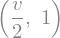

In [20]:
# Lachmann and Jablonka 1996 (adaptive)

# Define the two equations
eq1 = Eq(0, ue * (1 - ye))
eq2 = Eq(v, ue * (1 + ye))

# Solve eq1 for mu
ye_solution = solve(eq1, ye)[0]

# Substitute mu in eq2
eq2_substituted = eq2.subs(ye, ye_solution)

# Solve eq2_substituted for varphi
ue_solution = solve(eq2_substituted, ue)[0]

# Now, substute varphi_solution into eq1 and solve for mu
ue_final_solution = ue_solution.subs(ye, ye_solution)

# Display the solutions
simplify(ue_final_solution), simplify(ye_solution)

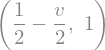

In [21]:
# Anonymous (2022)

# Define the two equations
eq1 = Eq(0, ue * (1 - ye))
eq2 = Eq(1-v, ue * (1 + ye))

# Solve eq1 for mu
ye_solution = solve(eq1, ye)[0]

# Substitute mu in eq2
eq2_substituted = eq2.subs(ye, ye_solution)

# Solve eq2_substituted for varphi
ue_solution = solve(eq2_substituted, ue)[0]

# Now, substute varphi_solution into eq1 and solve for mu
ue_final_solution = ue_solution.subs(ye, ye_solution)

# Display the solutions
simplify(ue_final_solution), simplify(ye_solution)

In [22]:
# Greenspoon and Spencer (2018) (t)

# Define the two equations
eq1 = Eq(l, ue * (1 - ye))
eq2 = Eq(l, ue * (1 + ye))

# Solve eq1 for mu
ue_solution = solve(eq1, ue)[0]

# Substitute mu in eq2
eq2_substituted = eq2.subs(ue, ue_solution)

# Solve eq2_substituted for varphi
ye_solution = solve(eq2_substituted, ye)[0]

# Now, substitute varphi_solution into eq1 and solve for mu
ue_final_solution = ue_solution.subs(ye, ye_solution)

# Display the solutions
simplify(ue_final_solution), simplify(ye_solution)

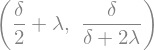

In [23]:
# Greenspoon and Spencer (2018) (T inducer)

# Define the two equations
eq1 = Eq(l, ue * (1 - ye))
eq2 = Eq(l+d, ue * (1 + ye))

# Solve eq1 for mu
ue_solution = solve(eq1, ue)[0]

# Substitute mu in eq2
eq2_substituted = eq2.subs(ue, ue_solution)

# Solve eq2_substituted for varphi
ye_solution = solve(eq2_substituted, ye)[0]

# Now, substitute varphi_solution into eq1 and solve for mu
ue_final_solution = ue_solution.subs(ye, ye_solution)

# Display the solutions
simplify(ue_final_solution), simplify(ye_solution)

In [24]:
# Greenspoon and Spencer (2018) (T mutagen)

# Define the two equations
eq1 = Eq(l+d, ue * (1 - ye))
eq2 = Eq(l+d, ue * (1 + ye))

# Solve eq1 for mu
ue_solution = solve(eq1, ue)[0]

# Substitute mu in eq2
eq2_substituted = eq2.subs(ue, ue_solution)

# Solve eq2_substituted for varphi
ye_solution = solve(eq2_substituted, ye)[0]

# Now, substitute varphi_solution into eq1 and solve for mu
ue_final_solution = ue_solution.subs(ye, ye_solution)

# Display the solutions
simplify(ue_final_solution), simplify(ye_solution)

In [25]:
################################
## Solving Classic Equilibria ##
################################

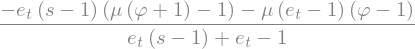

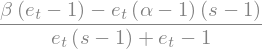

In [26]:
## solving for haploid mutation selection balance ##

# Define equations
w_bar = E_t + (1 - s)*e_t
E_s = E_t/w_bar
e_s = (1 - s)*e_t/w_bar
E_t1 = (1 - u*(1 - y))*E_s + u*(1 + y)*e_s
e_t1 = u*(1 - y)*E_s + (1 - u*(1 + y))*e_s

display(simplify(e_t1.subs({E_t:1-e_t})),
       simplify(e_t1.subs({E_t:1-e_t,u*(1+y):al,u*(1-y):be})))

In [27]:
solution = solve(Eq(e_t,simplify(e_t1.subs({E_t:1-e_t}))),e_t)


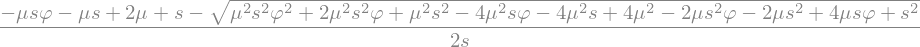

In [28]:
display(solution[0].subs({u:0.1,s:0.1,y:0}),solution[1].subs({u:0.1,s:0.1,y:0}),simplify(solution[0]))

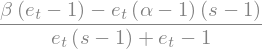

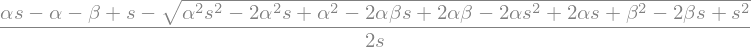

In [29]:
ab_eq = simplify(e_t1.subs({E_t:1-e_t,u*(1+y):al,u*(1-y):be}))
solution2 = solve(Eq(e_t,ab_eq),e_t)
display(ab_eq,simplify(1-solution2[1]))

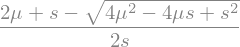

In [30]:
simplify(solution[0].subs({y:-1}))

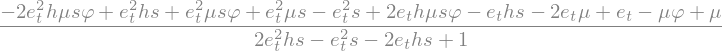

In [31]:
## solving for diploid mutation-selection balance ##

# Define alpha and beta parameters 
al = u * (1 + y)
be = u * (1 - y)
    
# Mean fitness
w_bar = (1-e_t)**2 + 2*(1-e_t)*e_t*(1-h*s) + e_t**2*(1-s)
    
# Genotype frequencies after selection
EE_s = (1-e_t)**2 / w_bar
Ee_s = 2*(1-e_t)*e_t*(1-h*s) / w_bar
ee_s = e_t**2*(1-s) / w_bar
    
# Allele frequencies after selection
E_s = EE_s + Ee_s/2
e_s = ee_s + Ee_s/2
    
# Allele frequencies after mutation
E_t1 = (1-be)*E_s + al*e_s
e_t1 = be*E_s + (1-al)*e_s
    
# Equilibrium equation (e_{t+1} = e_t)
equilibrium_eq = e_t1 - e_t
    
# Simplify equation by multiplying by w_bar to clear denominators
eq_simplified = simplify(equilibrium_eq * w_bar)

display(simplify(e_t1))

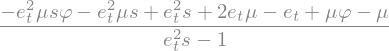

In [32]:
display(simplify(e_t1.subs({h:0})))

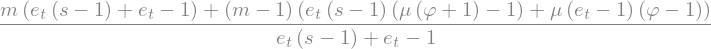

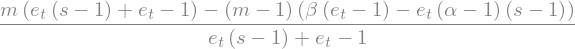

In [44]:
## solving for epimutation selection migration balance (y=-1) ##

# reset alpha and beta
al = Symbol('alpha')
be = Symbol('beta')

# Define equations
w_bar = E_t + (1 - s)*e_t
E_s = E_t/w_bar
e_s = (1 - s)*e_t/w_bar
E_u = (1 - u*(1 - y))*E_s + u*(1 + y)*e_s
e_u = u*(1 - y)*E_s + (1 - u*(1 + y))*e_s
E_t1 = (1-m)*E_u
e_t1 = (1-m)*e_u + m


display(simplify(e_t1.subs({E_t:1-e_t})),
       simplify(e_t1.subs({E_t:1-e_t,u*(1+y):al,u*(1-y):be})))

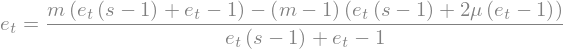

In [45]:
Eq(e_t,simplify(e_t1.subs({E_t:1-e_t,y:-1})))

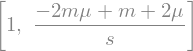

In [46]:
solution2 = solve(Eq(e_t,simplify(e_t1.subs({E_t:1-e_t,y:-1}))),e_t)
solution2

In [47]:
## solving for (beneficial epimutation)-migration balance ##

# define equations
E_u = (1 - u*(1 - y))*E_t + u*(1 + y)*e_t
e_u = u*(1 - y)*E_t + (1 - u*(1 + y))*e_t
E_t1 = (1-m)*E_u
e_t1 = (1-m)*e_u + m

display(simplify(e_t1.subs({E_t:1-e_t})),
       simplify(e_t1.subs({E_t:1-e_t,u*(1+y):al,u*(1-y):be})))

In [48]:
Eq(e_t,simplify(e_t1.subs({E_t:1-e_t,y:1})))

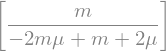

In [49]:
solution3 = solve(Eq(e_t,simplify(e_t1.subs({E_t:1-e_t,y:1}))),e_t)
solution3

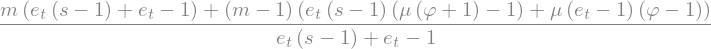

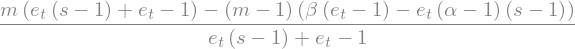

In [50]:
#### solving for migration-(beneficial epimutation)-selection balance ####

# Define equations
w_bar = E_t + (1 - s)*e_t
E_s = E_t/w_bar
e_s = (1 - s)*e_t/w_bar
E_u = (1 - u*(1 - y))*E_s + u*(1 + y)*e_s
e_u = u*(1 - y)*E_s + (1 - u*(1 + y))*e_s
E_t1 = (1-m)*E_u
e_t1 = (1-m)*e_u + m


display(simplify(e_t1.subs({E_t:1-e_t})),
       simplify(e_t1.subs({E_t:1-e_t,u*(1+y):al,u*(1-y):be})))

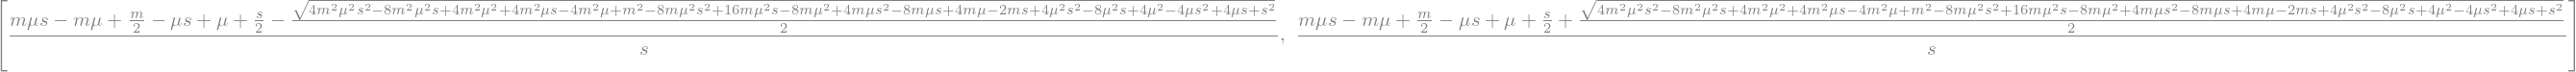

In [51]:
solution4 = solve(Eq(e_t,simplify(e_t1.subs({E_t:1-e_t,y:1}))),e_t)
solution4

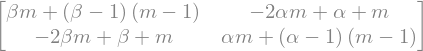

In [54]:
## the effective epimutation rate for epimutation-migration ##

M = Matrix([[1-m,m],[m,1-m]])
U = Matrix([[1-be,al],[be,1-al]])
# U = U.subs({u*(1-y):be,u*(1+y):al})

MU = M*U
simplify(MU)

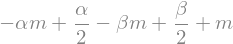

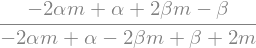

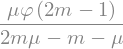

In [55]:
# two life history stages
# epimutation followed by migration

# Define the two equations
eq1 = Eq(-2*be*m+be+m, ue * (1 - ye))
eq2 = Eq(-2*al*m+al+m, ue * (1 + ye))

# Solve eq1 for mu
ue_solution = solve(eq1, ue)[0]

# Substitute mu in eq2
eq2_substituted = eq2.subs(ue, ue_solution)

# Solve eq2_substituted for varphi
ye_solution = solve(eq2_substituted, ye)[0]

# Now, substitute varphi_solution into eq1 and solve for mu
ue_final_solution = ue_solution.subs(ye, ye_solution)

# Display the solutions
display(simplify(ue_final_solution),
        simplify(ye_solution),
        simplify(ue_final_solution.subs({al:u*(1+y),be:u*(1-y)})),
        simplify(ye_solution.subs({al:u*(1+y),be:u*(1-y)}))
)


In [56]:
simplify(ue_final_solution.subs({al:u*(1+y),be:u*(1-y)}))